# S06 T01: Tasca dades, probabilitats i estadístiques
Descripció:
Aprèn a realitzar estadístiques amb Python.

## NIVELL 1
### Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica. 



Per a realitzar aquest sprint utilitzo el mateix conjunt de dades que l'sprint 5, relacionat amb les jugadores del mundial de futbol femení 2019.

In [1]:
# Crido a les llibreries que necessito
# Faig entrar l'arxiu CSV gràcies a pandas

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn

women = pd.read_csv("C:\\Users\\Anna\DataScience\\SPRINTS\\SPRINT 5\\Womens Squads.csv", encoding = "ISO-8859-1", engine='python', sep=";")

display(women)

,Squad no.,Country,Pos.,Player,DOB,Age,Caps,Goals,Club
0,1,US,GK,Alyssa Naeher,20-abr-88,31,43.0,0.0,Chicago Red Stars
1,2,US,FW,Mallory Pugh,29-abr-98,21,50.0,15.0,Washington Spirit
2,3,US,MF,Sam Mewis,09-oct-92,26,47.0,9.0,North Carolina Courage
3,4,US,DF,Becky Sauerbrunn,06-jun-85,34,155.0,0.0,Utah Royals
4,5,US,DF,Kelley O'Hara,04-ago-88,30,115.0,2.0,Utah Royals
...,...,...,...,...,...,...,...,...,...
547,19,France,DF,Griedge Mbock Bathy,26-feb-95,24,49.0,4.0,Lyon
548,20,France,FW,Delphine Cascarino,05-feb-97,22,11.0,1.0,Lyon
549,21,France,GK,Pauline Peyraud-Magnin,17-mar-92,27,1.0,0.0,Arsenal
550,22,France,DF,Julie Debever,18-abr-88,31,2.0,0.0,Guingamp


Seguidament faig una mica de resum estadístic bàsic del dataset


In [2]:
women.count()

Squad no.    552
Country      552
Pos.         552
Player       552
DOB          552
Age          552
Caps         520
Goals        520
Club         552
dtype: int64

In [3]:
# Com que en l'anterior punt veiem que les columnes "Caps" i "Goals" tenen menys quantitat de dades que la resta de columnes, em fa sospitar que hi ha nuls en aquest dataset, per tant ho comprovo

print(women.isnull())

print("____________________________________________________________________________")

print(women.count())

print("____________________________________________________________________________")

print(women.isnull().sum())

     Squad no.  Country   Pos.  Player    DOB    Age   Caps  Goals   Club
0        False    False  False   False  False  False  False  False  False
1        False    False  False   False  False  False  False  False  False
2        False    False  False   False  False  False  False  False  False
3        False    False  False   False  False  False  False  False  False
4        False    False  False   False  False  False  False  False  False
..         ...      ...    ...     ...    ...    ...    ...    ...    ...
547      False    False  False   False  False  False  False  False  False
548      False    False  False   False  False  False  False  False  False
549      False    False  False   False  False  False  False  False  False
550      False    False  False   False  False  False  False  False  False
551      False    False  False   False  False  False  False  False  False

[552 rows x 9 columns]
____________________________________________________________________________
Squad no.  

In [4]:
# Eliminem les files que contenen algun valor nul i comprobem que s'han eliminat, de manera que totes les files tenen la mateixa mida ara.

women = women.dropna(subset=["Caps", "Goals"])

women.count()

Squad no.    520
Country      520
Pos.         520
Player       520
DOB          520
Age          520
Caps         520
Goals        520
Club         520
dtype: int64

In [5]:
women.dtypes 

Squad no.      int64
Country       object
Pos.          object
Player        object
DOB           object
Age            int64
Caps         float64
Goals        float64
Club          object
dtype: object

In [6]:
women.describe()

,Squad no.,Age,Caps,Goals
count,520.000000,520.000000,520.000000,520.000000
mean,11.867308,26.178846,43.661538,7.348077
std,6.609365,3.996715,43.674846,15.541727
min,1.000000,16.000000,0.000000,0.000000
25%,6.000000,23.000000,11.750000,0.000000
50%,12.000000,26.000000,29.500000,1.500000
75%,18.000000,29.000000,62.000000,8.250000
max,23.000000,41.000000,282.000000,181.000000


Decideixo treballar amb l'atribut "Age" i procedeixo a calcular la moda, la mediana, la desviació estàndard i la mitjana aritmètica

In [7]:
# Em quedo només amb la columna "Age"

edat = women.Age

display(edat)

0      31
1      21
2      26
3      34
4      30
       ..
547    24
548    22
549    27
550    31
551    26
Name: Age, Length: 520, dtype: int64

MODA de l'atribut "Age"

In [8]:
moda = edat.mode()

print("La moda de la columna Age és", moda)

La moda de la columna Age és 0    26
dtype: int64


MEDIANA de l'atribut "Age"

In [9]:
mediana = edat.median()
print ("La mediana de la columna Age és", mediana)

La mediana de la columna Age és 26.0


DESVIACIÓ ESTÀNDARD de l'atribut "Age"

In [10]:
desvST = edat.std()
print ("La desviació estàndard de la columna Age és", desvST)

La desviació estàndard de la columna Age és 3.9967152475651884


MITJANA ARITMÈTICA de l'atribut "Age"

In [11]:
mitjanaAR = edat.mean()
print ("La mitjana aritmètica de la columna Age és", mitjanaAR)

La mitjana aritmètica de la columna Age és 26.178846153846155



### Exercici 2
Continuant amb les dades de tema esportiu, selecciona dos atributs i calcula'n la seva correlació. 



In [12]:
# Per calcular la correlació entre dos atributs escullo l'edat "Age" i les vegades que han participat les jugadores en partits amb la selecció, columna "Caps"

correlacio = np.corrcoef(women["Age"], women["Caps"])[0,1]

print("La correlació entre l'edat de les jugadores i dels partits jugats amb la selecció és de", correlacio, "és a dir, és una correlació positiva per tant si que té a veure l'edat amb els partits jugats" )

La correlació entre l'edat de les jugadores i dels partits jugats amb la selecció és de 0.5872482657884772 és a dir, és una correlació positiva per tant si que té a veure l'edat amb els partits jugats


Text(0, 0.5, 'Número de partits jugats amb la selecció')

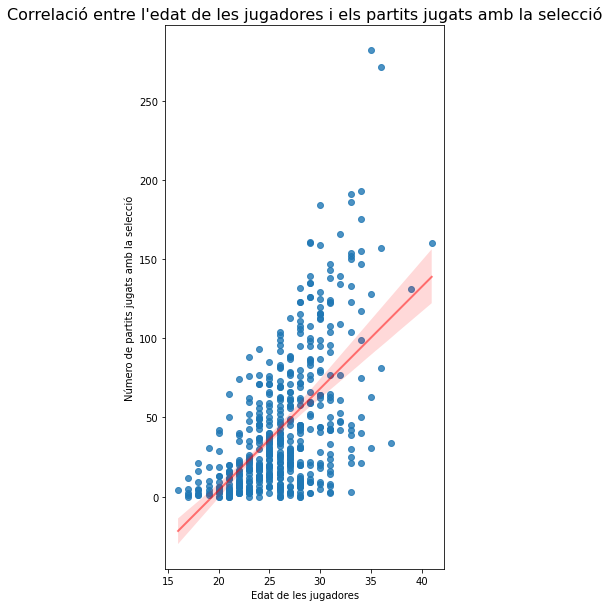

In [13]:
# Per fer més visible la correlació, ho representem amb un gràfic
plt.figure(figsize=(5,10))

sns.regplot(data = women,
            x = "Age",
            y = "Caps",  
            line_kws={"color":"r","alpha":0.5,"lw":2});

plt.title("Correlació entre l'edat de les jugadores i els partits jugats amb la selecció", fontsize=16)
plt.xlabel("Edat de les jugadores")
plt.ylabel("Número de partits jugats amb la selecció")

En el gràfic veiem que com més gran és la jugadora, normalment té més partits jugats, el que ens confirma que la correlació és positiva. També veiem que les jugadores es mouen tenre els 15 i els casi 45 anys i que el màxim de partits jugats per una jugadora amb la selecció és de casi 300 partits.
De forma general, també veiem que la majorai de les jugadores tenen entre 20 i 30 anys quan juguen amb la selecció, cosa que ja ens delimita una mica el rang d'edat de les jugadores professionals.

## NIVELL 2
### Exercici 3
Continuant amb les dades de tema esportiu, calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat.


Per fer aquesta comparació de correlació, em centraré només en les columnes/atributs que són numèrics i dels quals en puc veure millor la correlació entre ells. Per tant, el primer que faig és crear una variable amb els atributs que vull treballar

In [14]:
numerics = women.select_dtypes(include=[np.number]) #utilitzo aquesta funció per separar els atributs que són numèrics

display(numerics)

,Squad no.,Age,Caps,Goals
0,1,31,43.0,0.0
1,2,21,50.0,15.0
2,3,26,47.0,9.0
3,4,34,155.0,0.0
4,5,30,115.0,2.0
...,...,...,...,...
547,19,24,49.0,4.0
548,20,22,11.0,1.0
549,21,27,1.0,0.0
550,22,31,2.0,0.0


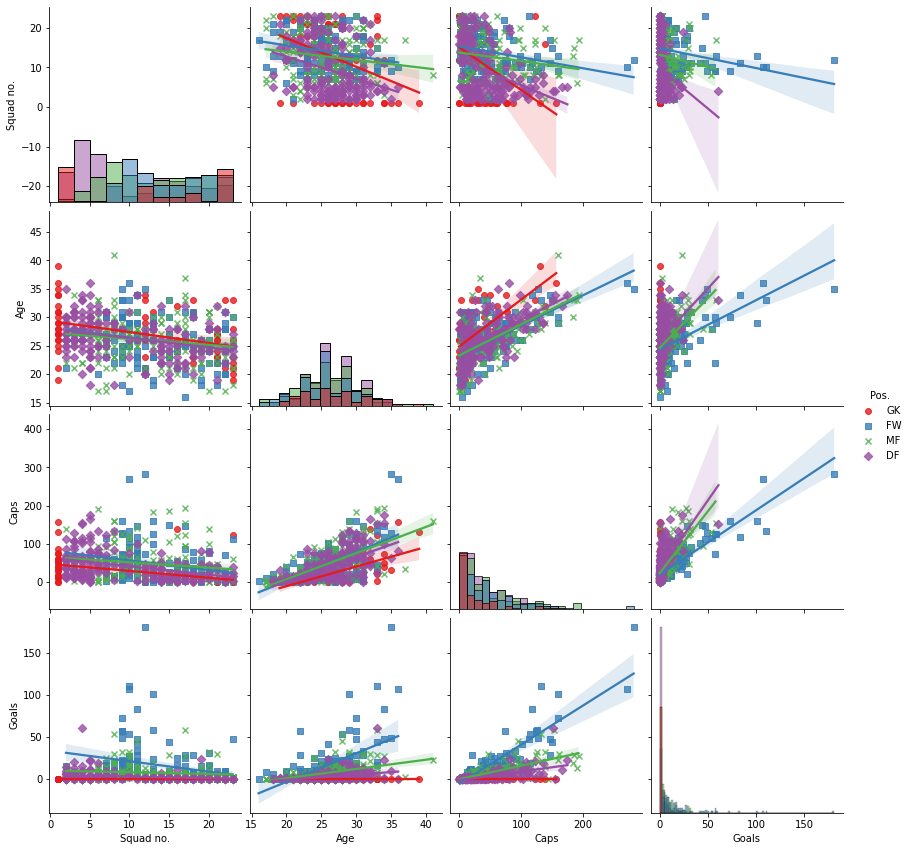

In [15]:
# Comparació gràfica de totes les columnes contra totes les columnes

sns.pairplot(
    data=women,
    hue = "Pos." ,
    height=3,
    kind = "reg",
    diag_kind='hist',
    palette="Set1",
    markers=["o", "s", "x", "D"])
    

In [16]:
# Aquí tenim el mateix d'abans però representat amb números, gràcies a la funció corr()

numerics.corr()

,Squad no.,Age,Caps,Goals
Squad no.,1.000000,-0.258550,-0.263739,-0.045637
Age,-0.258550,1.000000,0.587248,0.323084
Caps,-0.263739,0.587248,1.000000,0.663597
Goals,-0.045637,0.323084,0.663597,1.000000


Veiem doncs, que tenim tres correlacions positives (Age vs Caps, Age vs Goals i Caps vs Goals) i tres correlacions negatives, que coincideixen totes amb l'atribu Squad no. que és el número dins l'equip i per tant no té cap efecte pràctic estudiar aquest atribut en temes estadístics.
Per tant, els tres atributs que ens interessen tenen tots tres correlacions positives entre si, això però pot ser informació enganyosa, perquè no estem tenint en compte els gols que fa per partit o temporada, sinó els gols acumulats, o tampoc tenim en compte la posició on juga (l'he utilitzat només per imprimir en colors en el gràfic anterior), per tant, més que correlació és lògica, ja que com més gran és una jugadora, en teoria més partits ha jugat i més gols acumulats té.

## NIVELL 3
### Exercici 4
Continuant amb les dades de tema esportiu, selecciona un atribut i calcula la mitjana geomètrica i la mitjana harmònica.

La MITJANA GEOMÈTRICA és molt útil per comparar valors molt diferents, i bàsicament consisteix en agafar els valors, multiplicar-los i fer-ne l'arrel de la suma del total de valors.


In [19]:
# Per fer el càlcul ràpid utilitzo la llibrearia statistics

import statistics

mitjanaGeo = statistics.geometric_mean(edat)

print("La mitjana geomètrica de les edats de les jugadores és", mitjanaGeo)

La mitjana geomètrica de les edats de les jugadores és 25.871465437093583


La MITJANA HARMÒNICA consisteix en dividir 1 per cadascun dels valors, llavors es sumen entre ells i per últim es divideix el número total de valors pel resultat que ha donat la suma de les divisions anteriors.

La mitjana harmònica és un tipus de promig, una mesura de la tendència central de les dades. Generalment és adequada per calcular promitjos de taxes o fraccions.


In [21]:
# Per fer el càlcul ràpid utilitzo la llibrearia statistics

mitjanaHar = statistics.harmonic_mean(edat)

print("La mitjana harmònica de les edats de les jugadores és", mitjanaHar)

La mitjana harmònica de les edats de les jugadores és 25.559446319692423
